# Цель лабораторной работы
Изучить различные методы визуализации данных [1].

# Задание
Требуется выполнить следующие действия [1]:
* Выбрать набор данных (датасет).
* Создать ноутбук, который содержит следующие разделы:
  1. Текстовое описание выбранного набора данных.
  2. Основные характеристики датасета.
  3. Визуальное исследование датасета.
  4. Информация о корреляции признаков.
* Сформировать отчет и разместить его в&nbsp;своем репозитории на&nbsp;GitHub.

# Ход выполнения работы

## Текстовое описание набора данных
В&nbsp;качестве набора данных используются метрологические данные с&nbsp;метеостанции HI-SEAS (Hawaii Space Exploration Analog and Simulation) за&nbsp;четыре месяца (с&nbsp;сентября по&nbsp;декабрь 2016&nbsp;года) [2].

Данный набор данных состоит из&nbsp;одного файла `SolarPrediction.csv`, содержащего все данные этого датасета. Данный файл содержит следующие колонки:
* `UNIXTime` — временная метка измерения в&nbsp;формате UNIX;
* `Data` — дата измерения;
* `Time` — время измерения (в&nbsp;местной временной зоне);
* `Radiation` — солнечное излучение (Вт/м<sup>2</sup>);
* `Temperature` — температура (°F);
* `Pressure` — атмосферное давление (дюймов ртутного столба);
* `Humidity` — относительная влажность (%);
* `WindDirection(Degrees)` — направление ветра (°);
* `Speed` — скорость ветра (миль/ч);
* `TimeSunRise` — время восхода (в&nbsp;местной временной зоне);
* `TimeSunSet` — время заката (в&nbsp;местной временной зоне).

## Основные характеристики набора данных

Подключим все необходимые библиотеки:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Настроим отображение графиков [3, 4]:

In [2]:
# Enable inline plots
%matplotlib inline

# Set plot style
sns.set(style="ticks")

# Set plots formats to save high resolution PNG
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

Загрузим непосредственно данные:

In [3]:
data = pd.read_csv("./SolarPrediction.csv")

Преобразуем временные колонки в соответствующий временной формат:

In [4]:
data["UNIXTime"] = pd.to_datetime(data["UNIXTime"], unit="s", utc=True).dt.tz_convert("Pacific/Honolulu")
data["Data"] = data["UNIXTime"].dt.date
data["Time"] = data["UNIXTime"].dt.time
data["TimeSunRise"] = pd.to_datetime(data["TimeSunRise"], infer_datetime_format=True).dt.time
data["TimeSunSet"] = pd.to_datetime(data["TimeSunSet"], infer_datetime_format=True).dt.time
data = data.rename({"Data": "Date", "WindDirection(Degrees)": "WindDirection"}, axis=1)
data.dtypes

UNIXTime         datetime64[ns, Pacific/Honolulu]
Date                                       object
Time                                       object
Radiation                                 float64
Temperature                                 int64
Pressure                                  float64
Humidity                                    int64
WindDirection                             float64
Speed                                     float64
TimeSunRise                                object
TimeSunSet                                 object
dtype: object

In [5]:
data.head()

,UNIXTime,Date,Time,Radiation,Temperature,Pressure,Humidity,WindDirection,Speed,TimeSunRise,TimeSunSet
0,2016-09-29 23:55:26-10:00,2016-09-29,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,2016-09-29 23:50:23-10:00,2016-09-29,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,2016-09-29 23:45:26-10:00,2016-09-29,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,2016-09-29 23:40:21-10:00,2016-09-29,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,2016-09-29 23:35:24-10:00,2016-09-29,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


## Визуальное исследование датасета

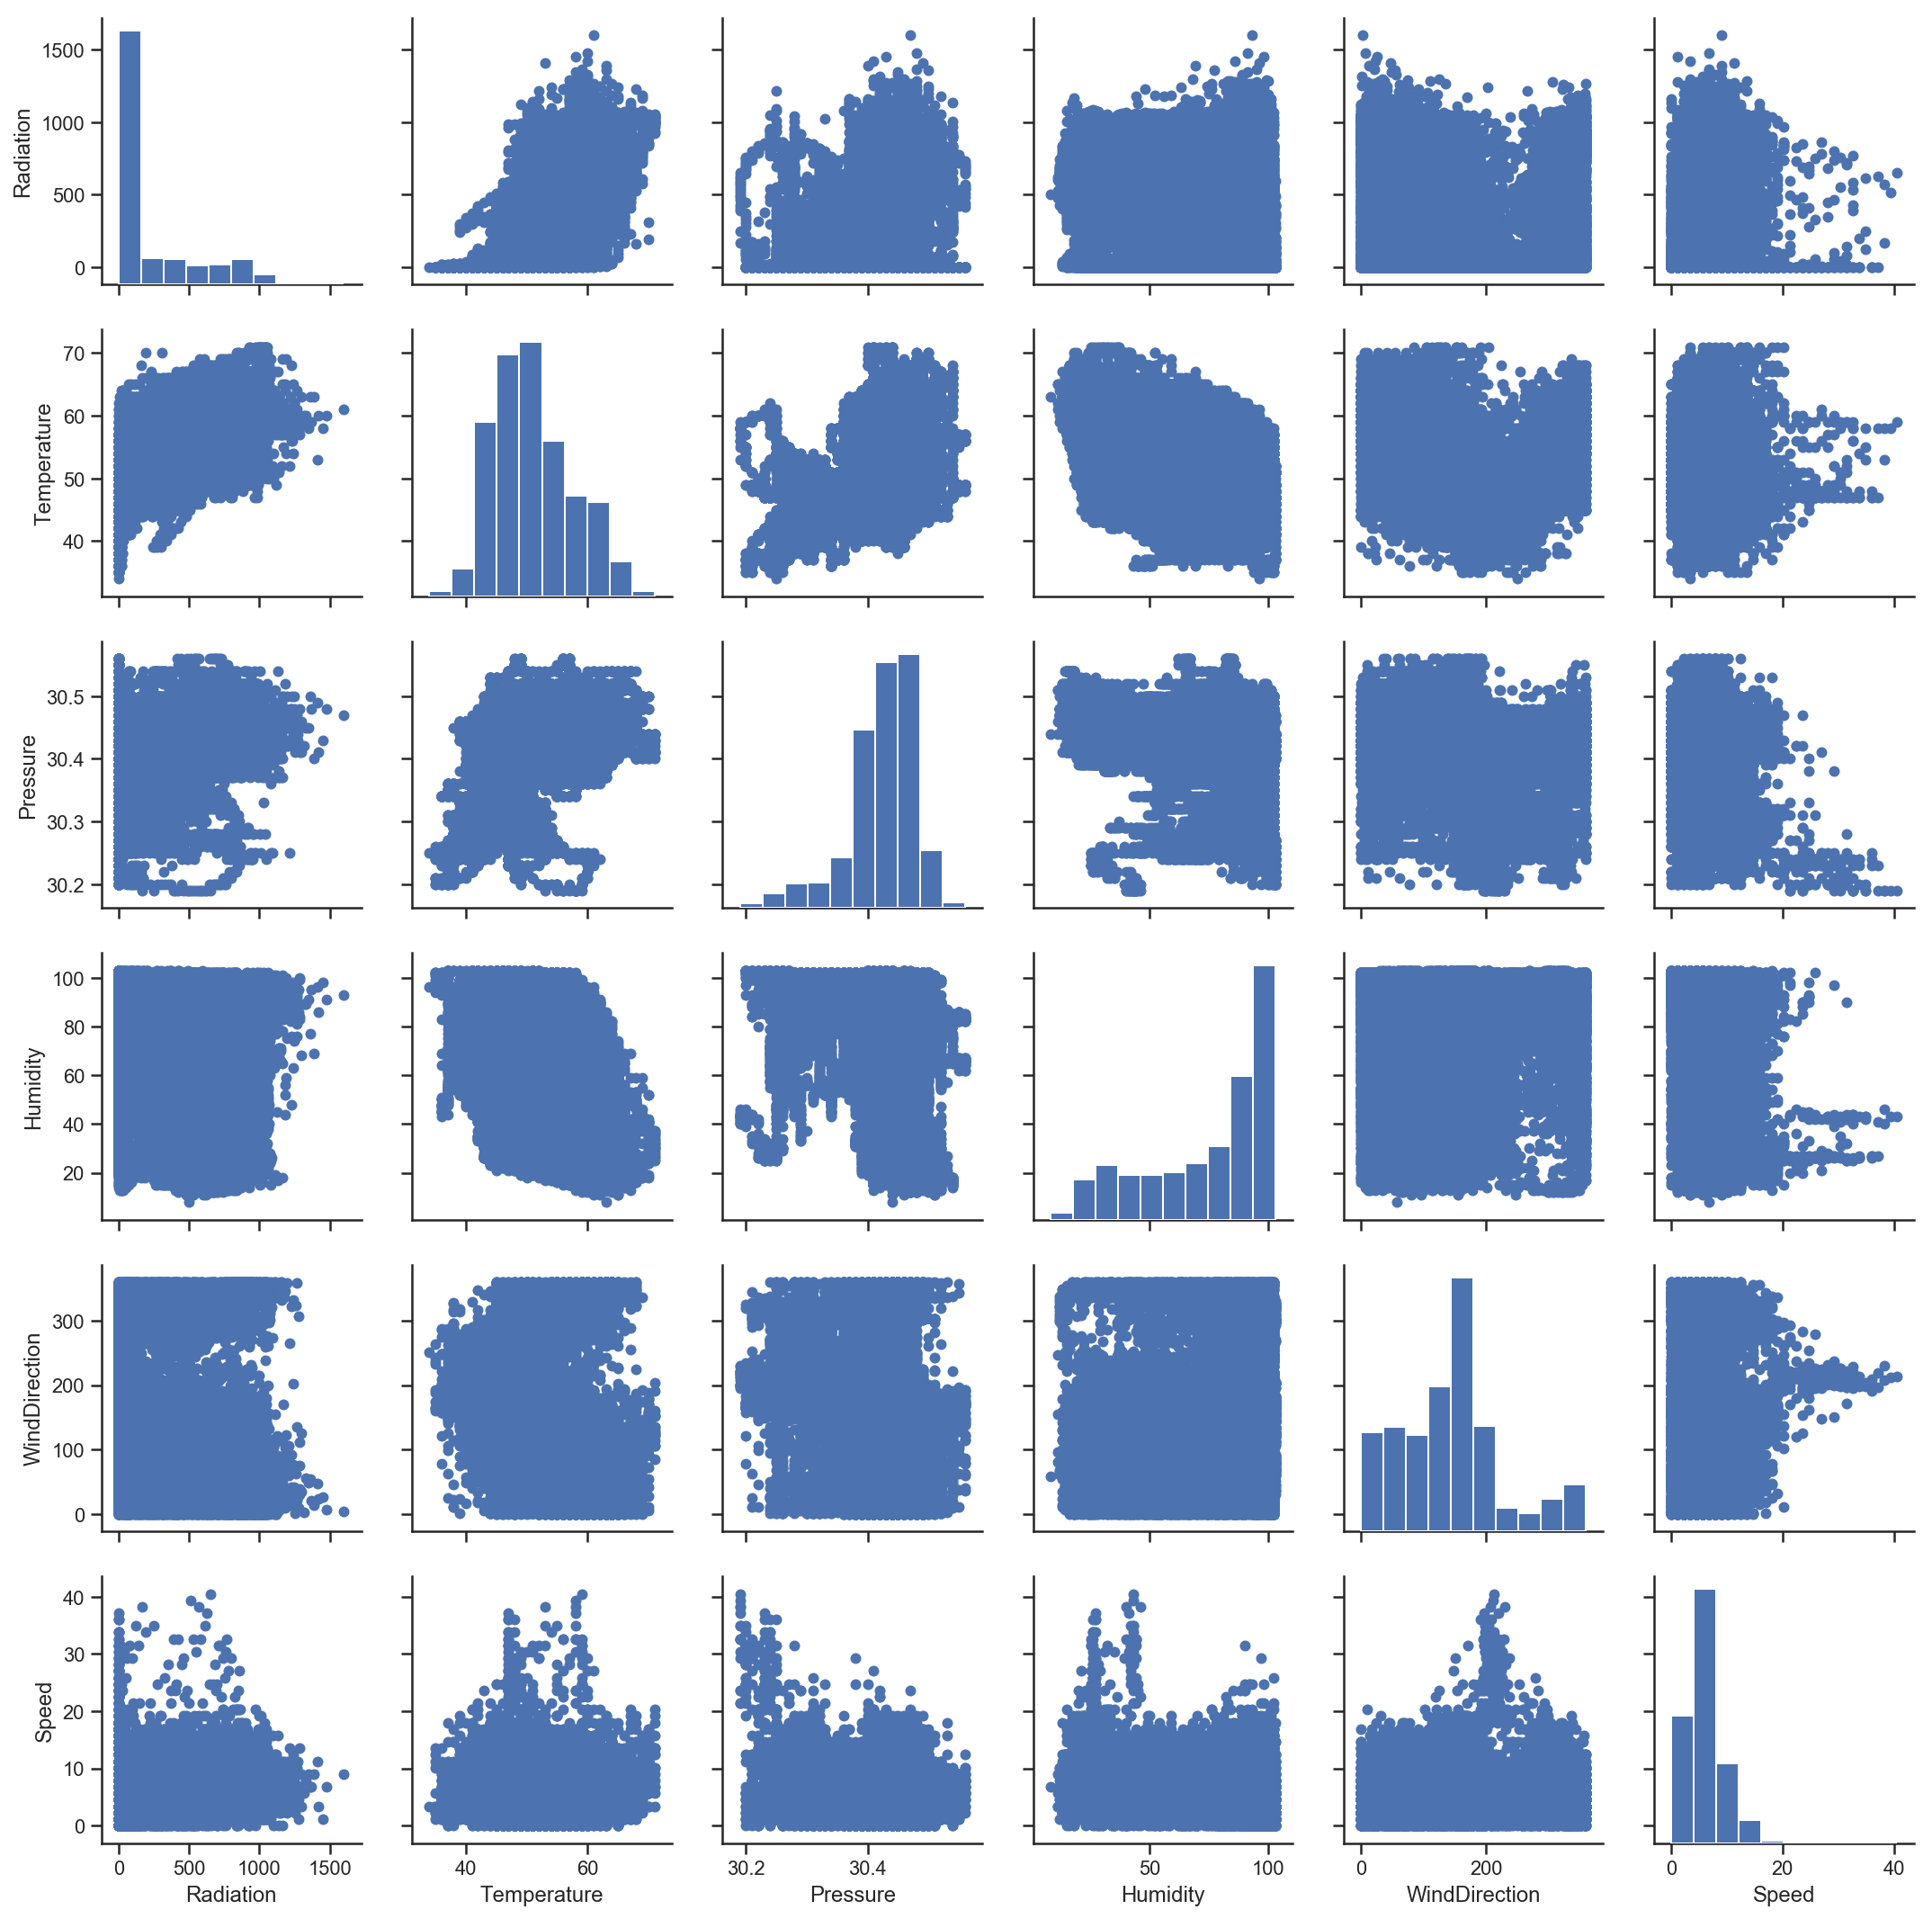

In [6]:
sns.pairplot(data, plot_kws=dict(linewidth=0));

## Информация о корреляции признаков

# Список использованной литературы
1. Гапанюк Ю.Е. Лабораторная работа «Разведочный анализ данных. Исследование и визуализация данных» [Электронный ресурс] // ugapanyuk/ml_course Wiki // GitHub. 2019. URL: https://github.com/ugapanyuk/ml_course/wiki/LAB_EDA_VISUALIZATION (дата обращения: 13.02.2019).
2. dronio. Solar Radiation Prediction [Electronic resource] // Kaggle. 2017. URL: https://www.kaggle.com/dronio/SolarEnergy (дата обращения: 18.02.2019).
3. The IPython Development Team. IPython 7.3.0 Documentation [Electronic resource] // Read the Docs. 2019. URL: https://ipython.readthedocs.io/en/stable/ (дата обращения: 20.02.2019).
4. Waskom M. seaborn 0.9.0 documentation [Electronic resource]. 2018. URL: https://seaborn.pydata.org/ (дата обращения: 20.02.2019).